<a href="https://colab.research.google.com/github/alalghzy/Statistik-Terapan/blob/main/083_097_Handling_Outliers_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Outliers and Correlation Analysis

```
Anggota Kelompok:
G1A021083 Rayhan M. Rizki | G1A021097 Rafif Alghazy
Kelas : Informatika A
```






# Penjelasan Dataset
Dataset ini berisi data geografis kota-kota di India. Pada dataset ini, menampilkan garis lintang dan garis bujur dari setiap kota yang telah disurvei yang ada di India. Dataset ini dibuat untuk membantu semua orang yang ingin membuat plot untuk kota yang ada di India. Dataset ini diambil dari  [India Geo Dataset](https://github.com/bill-chpper/india-geo-dataset.git) dan berasal dari Kaggle [Geographic data of Indian cities](https://www.kaggle.com/datasets/yugalkishore/geographic-data-of-indian-cities?select=IND_cities_geo_data.csv.).

In [ ]:
#library yang digunakan untuk handling data outliers
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
#mengambil dataset dari url, serta menampilkan dataset 5 record teratas dari dataset yang telah di load
df = pd.read_csv('https://raw.githubusercontent.com/bill-chpper/india-geo-dataset/main/India_cities_geo_data.csv')
df.head()

,city,latitude,longitude,country
0,Abohar,30.1204,74.2900,India
1,Addanki,15.8110,79.9738,India
2,Adilabad,19.6667,78.5333,India
3,adoni,15.6300,77.2800,India
4,Agartala,23.8333,91.2667,India


#  Detecting and handling outliers using scatterplot and trimming
Code ini akan melakukan detecting outliers menggunakan scatterplot pada dataset kolom longitude, kemudian akan melakukan handling outliers menggunakan trimming. 

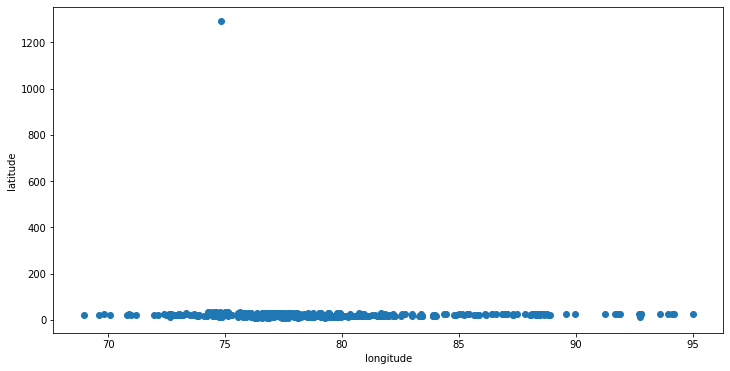

In [ ]:
#detecting outliers menggunakan scatterplot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['longitude'], df['latitude'])
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

In [ ]:
#menghapus outliers dengan trimming
index = df[(df['latitude'] >= 100)|(df['latitude'] <= 18)].index
df.drop(index, inplace=True)
index = df[(df['longitude'] >= 83)|(df['longitude'] <= 76.5)].index
df.drop(index, inplace=True)

df['longitude'].describe(), df['latitude'].describe()

(count    92.000000
 mean     78.674463
 std       1.572055
 min      76.566700
 25%      77.416700
 50%      78.320000
 75%      79.469850
 max      82.683300
 Name: longitude, dtype: float64, count    88.000000
 mean     25.032281
 std       4.257543
 min      18.316700
 25%      20.649975
 50%      26.767950
 75%      28.645000
 max      31.103300
 Name: latitude, dtype: float64)

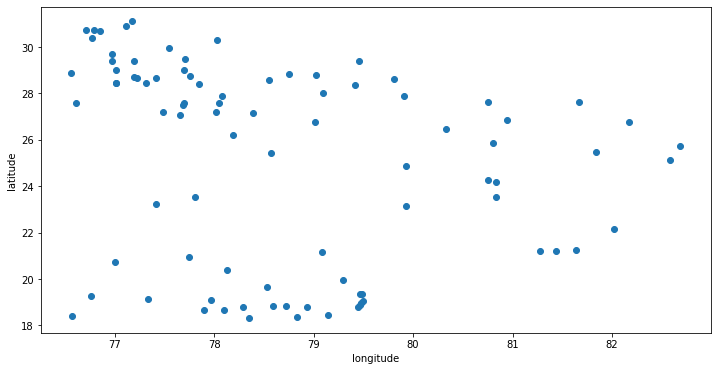

In [ ]:
#mengecek kembali outliers yang ada pada data
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['longitude'], df['latitude'])
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

#  Detecting outliers using zscores and handling outliers using median imputation
Pada code ini akan melakukan detecting outliers menggunakan zscores pada dataset kolom latitude. Kemudian outliers akan ditangani menggunakan metode replacing outliers with median values.

In [ ]:
#detecting outliers using zscores
df = pd.read_csv('https://raw.githubusercontent.com/bill-chpper/india-geo-dataset/main/India_cities_geo_data.csv')
mean = np.mean(df.latitude)
std = np.std(df.latitude)
threshold = 3
outlier = []
for i in df.latitude:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [1290.0]


Setelah mendeteksi outliers pada dataset kolom latitude. Terlihat terdapat 1 outliers, yaitu 1290.0 yang ada pada dataset kolom latitude.

In [ ]:
#handling outliers menggunakan metode replacing outliers with median values
print(df['latitude'].quantile(0.10)) 
print(df['latitude'].quantile(0.90)) 
df['latitude'] = np.where(df['latitude'] > 23,63, df['latitude']) #23 dan 63 merupakan median dari persentil
df.latitude

13.0515
28.662679999999998


0      63.0000
1      15.8110
2      19.6667
3      15.6300
4      63.0000
        ...   
407     9.9800
408    63.0000
409    63.0000
410    63.0000
411    20.9500
Name: latitude, Length: 412, dtype: float64

In [ ]:
#mengecek kembali outliers pada dataset
mean = np.mean(df.latitude)
std = np.std(df.latitude)
threshold = 3
outlier = []
for i in df.latitude:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


Dapat terlihat bahwa outliers pada dataset kolom latitude sudah tidak ada dan nilainya telah diganti dengan median dataset.

# Detecting and Handling outliers using boxplot and quantile based flooring-capping
Pada code ini akan menampilkan outliers dengan menggunakan boxplot pada dataset kolom longitude. Kemudian akan melakukan handling outliers dengan metode quantile based flooring and capping.

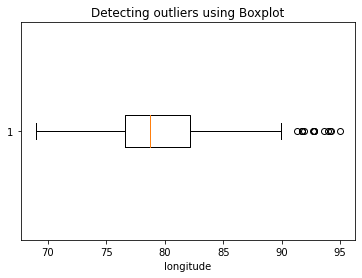

In [ ]:
#menampilkan outliers pada data dengan metode boxplot
df = pd.read_csv('https://raw.githubusercontent.com/bill-chpper/india-geo-dataset/main/India_cities_geo_data.csv')
plt.boxplot(df.longitude, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('longitude')
plt.show()

In [ ]:
#Handling outliers dengan quantile based flooring and capping
tenth_percentile = np.percentile(df.longitude, 10)
ninetieth_percentile = np.percentile(df.longitude, 90)
print(tenth_percentile, ninetieth_percentile) 
a = np.where(df.longitude<tenth_percentile, tenth_percentile, df.longitude)
a = np.where(a>ninetieth_percentile, ninetieth_percentile, a)

73.902 88.36957000000001


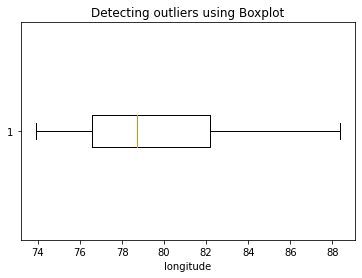

In [ ]:
#Menggunakan boxplot untuk mengecek apakah masih ada outliers atau tidak
plt.boxplot(a, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('longitude')
plt.show()

# Correlation analysis
Analisis korelasi merupakan sebuah analisis yang digunakan untuk mengetahui keeratan hubungan antara beberapa variabel. Biasanya uji korelasi ini akan sangat berhubungan dengan uji regresi yang menunjukkan apakah masing-masing variabel saling mempengaruhi. Meskipun variabel tersebut saling berhubungan erat atau berkorelasi, belum tentu variabel tersebut saling mempengaruhi. Dalam analisis korelasi ini, output yang dihasilkan hanya dalam rentang -1 sampai 1 dan terbagi menjadi korelasi positif (hasil positif), korelasi negatif (hasil negatif), dan tidak berkorelasi sama sekali (0).

In [ ]:
#digunakan untuk mengetahui korelasi antar kolom
df.corr()

,latitude,longitude
latitude,1.000000,-0.036484
longitude,-0.036484,1.000000


Hubungan antara kolom latitude dan kolom latitude, serta kolom longitude dan kolom longitude adalah 1 yang merupakan korelasi positif dan akan saling memengaruhi. Sedangkan korelasi antara kolom latitude dan longitude adalah -0.036484 yang merupakan korelasi negatif karena memiliki hasil negatif.

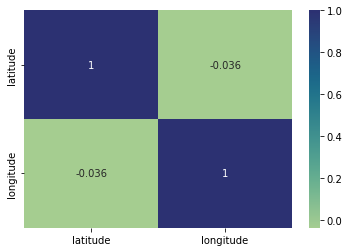

In [ ]:
#menampilkan korelasi antar kolom dengan bantuan visualisasi berupa heatmap
sns.heatmap(df.corr(), cmap="crest", annot=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

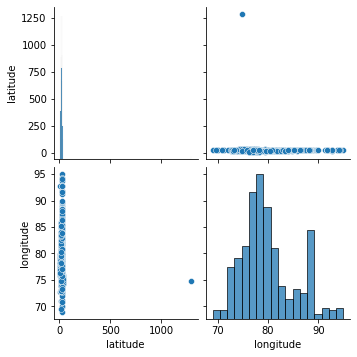

In [ ]:
#menampilkan korelasi dengan pairplot
sns.pairplot(df)
plt.show

Pairplot adalah visualisasi korelasi data yang menggunakan berbagai jenis plot dari modul yang berbeda untuk merepresentasikan berbagai aspek kumpulan data dalam satu gambar. Kedua plot adalah fungsi figure-level dan membuat gambar dengan jumlah subplot yang banyak secara default.